<a href="https://colab.research.google.com/github/HyejuSeon/deep_learning_study/blob/main/mnist2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

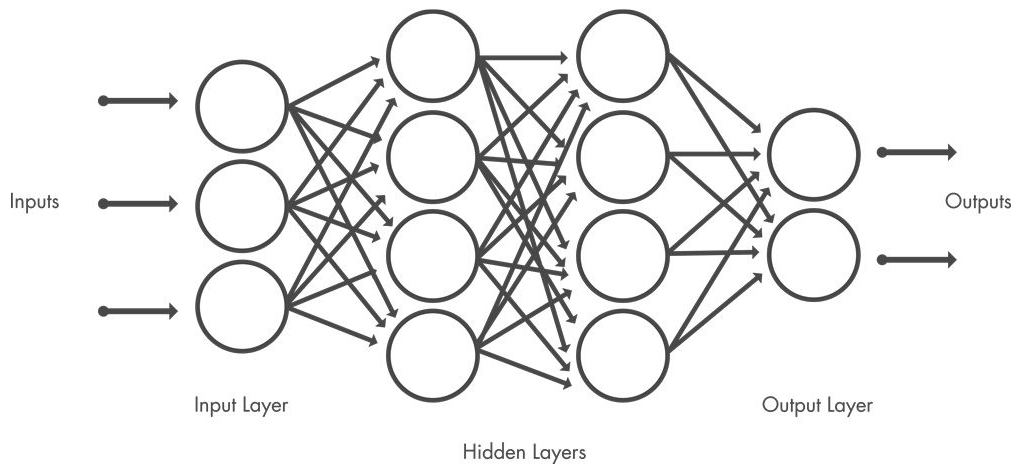

## 딥러닝
- 머신러닝의 한 분야로 인공신경망을 쌓아올려 데이터를 학습하는 방식
- 크게 input layer, hidden layer, output layer로 나뉨
- 다음 레이어로 전달될 때 각 유닛에 가중치(w)가 곱해져서 전달됨

  -> 전달 받은 결과의 모두 더해서 해당 유닛을 활성화시킬지 판단

  -> 이때 activation function을 씌워서 값을 보정
 (https://wikidocs.net/60683)

- 가설 수립 -> 모델 정의 및 학습 -> 평가 -> 가설 수립(피드백) -> 모델 정의 및 학습 -> ... 반복 ...

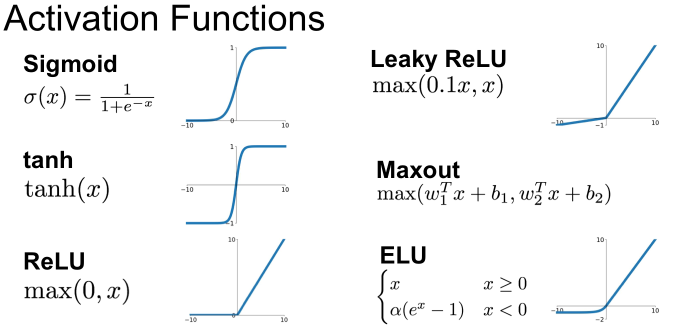

In [54]:
import numpy as np
import matplotlib.pyplot as plt


from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical
from keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import KFold

In [ ]:
import tensorflow as tf
print(tf.test.gpu_device_name())

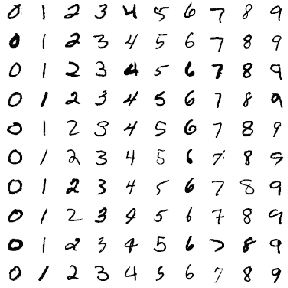

## Train/Validation/Test split



### split 비율

- train:test = 7:3 or train:val:test = 6:2:2

- BUT 빅데이터는 98:1:1
    
  val/testset은 평가만 하기 때문에



In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)


In [ ]:
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [ ]:
type(x_train)
# python list 보다 연산이 빠름
# -> 행렬 내적 연산 훨씬 빠름

numpy.ndarray

In [ ]:
x_train[0]

5


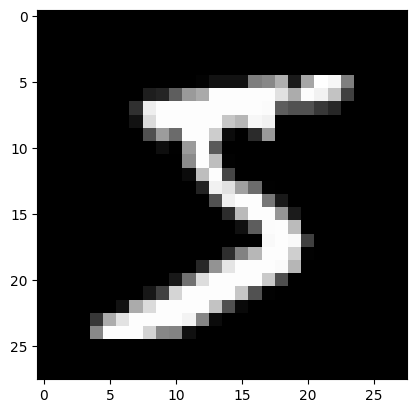

In [ ]:
plt.imshow(x_train[0], cmap='gray')
print(y_train[0])

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

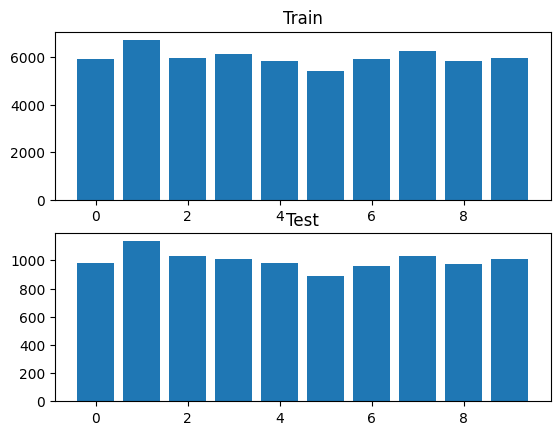

In [ ]:
labels_train, cnts_train = np.unique(y_train, return_counts=True)
labels_test, cnts_test = np.unique(y_test, return_counts=True)

plt.subplot(2, 1, 1)
plt.bar(labels_train, cnts_train)
plt.title('Train')

plt.subplot(2, 1, 2)
plt.bar(labels_test, cnts_test)
plt.title('Test')
plt.show()

## loss

- 정답값과 모델의 예측값을 통해 loss를 계산하는 함수

- 모델은 loss를 최소화하는 weight을 찾는 방향으로 학습 수행 -> 이때 사용하는 최적화 알고리즘이 optimizer

#### binary_crossentropy
- binary classification

<br>

#### categorical_crossentropy
- multi-class classification
- label이 one-hot encoding 형태일 때 사용

>  label에 사람, 강아지, 고양이가 있다면 <br> 사람 -> (1, 0, 0) <br> 강아지 -> (0, 1, 0) <br> 고양이 -> (0, 0, 1)

<br>

#### sparse_categorical_crossentropy
- multi-class classification
- label 정수 형태에서 사용

> label 예시 - 정수 <br> 사람 -> 0, 강아지 -> 1, 고양이 -> 2

In [ ]:
model = Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4265 - accuracy: 0.8567
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3754 - accuracy: 0.9115
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2844 - accuracy: 0.9276
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2457 - accuracy: 0.9359
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2264 - accuracy: 0.9417
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2091 - accuracy: 0.9452
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2015 - accuracy: 0.9484
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1945 - accuracy: 0.9512
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1890 - accuracy: 0.9533
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.186

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2571 - accuracy: 0.9459


[0.2571479380130768, 0.945900022983551]

In [ ]:
model(x_train[:1])

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.0000000e+00, 3.8024923e-21, 0.0000000e+00, 1.2134931e-04,
        9.1773041e-36, 9.9987864e-01, 0.0000000e+00, 2.8804307e-12,
        2.0300078e-14, 9.9684305e-09]], dtype=float32)>

In [ ]:
y_train[0]

5

## Bias (편향) / Variance (분산)

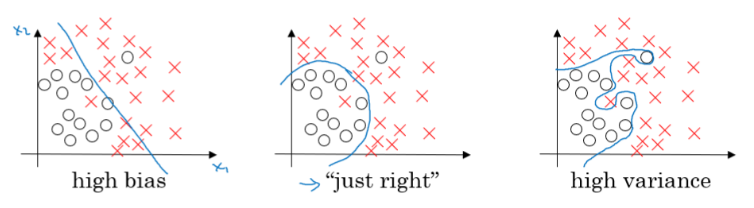

- high variance -> Overfitting
- high bias -> Underfitting

<br>

- 어떻게 판단?

  Training error 낮고, Dev error 높음 -> Overfitting (일반화 x)

  Training error 높고, Dev error 높음 -> Underfitting (+Overfitting -> error 차이가 큰 경우)

<br>

- 해결 방법

  High bias -> 더 큰 네트워크 사용(more layer, more hidden units), epoch 증가

  High Variance -> 더 많은 데이터 학습, 정규화 (Regularization)

  <br>


- 둘은 tradeoff?

  예전엔 YES, 지금은 더 큰 네트워크 구성하면 bias는 variance와 상관없이 대체로 줄어듦

## Regularization

#### L2 norm

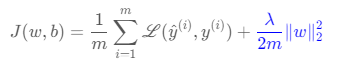


- 위 수식은 가장 많이 사용되는 L2 Regularization -> 가중치 감쇠라고도 함 (Weight Decay)

- lambda 값이 클수록 규제 효과가 커짐 -> hidden unit의 영향도가 작아짐

### Dropout

- 각 레이어에서 비활성화할 노드 비율 설정

- test set은 dropout 사용 X -> 예측값이 랜덤해짐 -> noise 추가

### Data Augementation

### Early Stopping


## Normalization

- feature 간 데이터 스케일을 유사하게 맞춤 + feature 값의 범위가 클수록 학습이 어려움 -> 학습 시 더 빠르게 최적화 가능

  learning rate 높게 설정하면 값이 발산해서 최적화가 힘듦

  ex. x1: -1 ~ 1, x2: -100000000000 ~ 100000000000

## mini batch

- 전체 데이터를 작은 데이터셋 여러 개로 나누어 학습

  -> 한 번에 학습할 데이터셋이 작아짐 -> 연산량 감소 -> 가중치 업데이트가 빠름

- 보통 64, 128, 256, 512로 세팅




In [3]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

In [ ]:
np.unique(x_train_norm)

In [ ]:
model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4091 - accuracy: 0.8743
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1556 - accuracy: 0.9552
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1133 - accuracy: 0.9672
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0858 - accuracy: 0.9745
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0658 - accuracy: 0.9799
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0522 - accuracy: 0.9837
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0408 - accuracy: 0.9875
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0331 - accuracy: 0.9900
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0261 - accuracy: 0.9924
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.022

In [ ]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0738 - accuracy: 0.9791


[0.07379365712404251, 0.9790999889373779]

In [ ]:
model.predict(x_train[:1])

1/1 [==============================] - 0s 140ms/step


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
model(x_train[:1]).numpy()

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [49]:
class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.flatten = Flatten()
    self.dropout = Dropout(0.2)
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(64, activation='relu')
    self.softmax = Dense(10, activation='softmax')

  def call(self, x):
    x = self.flatten(x)
    x = self.d1(x)
    x = self.dropout(x)
    x = self.d2(x)
    x = self.dropout(x)
    return self.softmax(x)

  def summary(self):
    inputs = Input((28, 28))
    Model(inputs, self.call(inputs)).summary()

In [12]:
model2 = MyModel()

model2.summary()

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist = model2.fit(x_train_norm,
                  y_train,
                  epochs=10,
                  validation_split=0.2,
                  shuffle=True,
                  batch_size=32)  # shuffle 전에 val set 분리

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 0.2821 - accuracy: 0.9191 - val_loss: 0.1608 - val_accuracy: 0.9533
Epoch 2/10
1500/1500 [===================

In [15]:
model2.evaluate(x_test_norm, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0808 - accuracy: 0.9780


[0.08082147687673569, 0.9779999852180481]

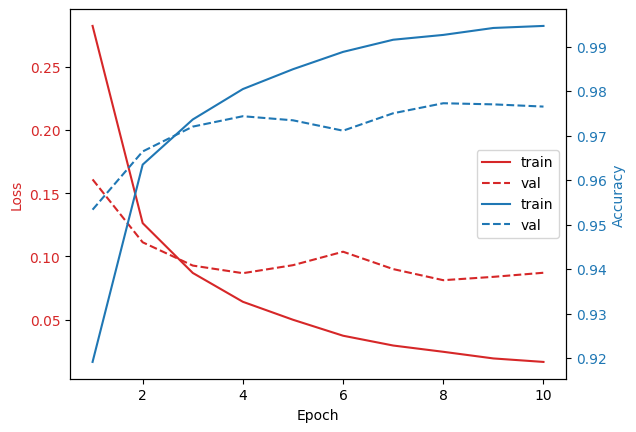

In [13]:
def draw_graph(history):
  loss = history.history['loss']
  accuracy = history.history['accuracy']
  val_loss = history.history['val_loss']
  val_accuracy = history.history['val_accuracy']

  epochs = list(range(1, len(loss)+1))

  fig, ax1 = plt.subplots()

  color = 'tab:red'
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Loss', color=color)
  ax1.plot(epochs, loss, color=color, label='train')
  ax1.plot(epochs, val_loss, linestyle='--', color=color, label='val')
  ax1.tick_params(axis='y', labelcolor=color)

  ax2 = ax1.twinx()

  color = 'tab:blue'
  ax2.set_ylabel('Accuracy', color=color)
  ax2.plot(epochs, accuracy, color=color, label='train')
  ax2.plot(epochs, val_accuracy, linestyle='--', color=color, label='val')
  ax2.tick_params(axis='y', labelcolor=color)

  lines1, labels1 = ax1.get_legend_handles_labels()
  lines2, labels2 = ax2.get_legend_handles_labels()
  lines = lines1 + lines2
  labels = labels1 + labels2
  ax1.legend(lines, labels, loc='center right')

  plt.show()

draw_graph(hist)

In [24]:
model3 = MyModel()

model3.summary()

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist = model3.fit(x_train_norm,
                  y_train,
                  epochs=10,
                  validation_split=0.2,
                  shuffle=True,
                  batch_size=32)  # shuffle 전에 val set 분리

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1500/1500 [==============================]

In [28]:
model3.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0687 - accuracy: 0.9788


[0.06865980476140976, 0.9787999987602234]

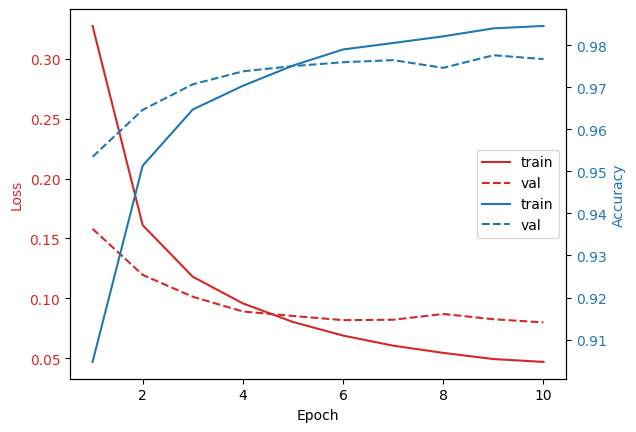

In [25]:
draw_graph(hist)

In [32]:
model4 = MyModel()

model4.summary()

model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss',
                   patience=3,
                   restore_best_weights= True)

hist = model4.fit(x_train_norm,
                  y_train,
                  epochs=20,
                  validation_split=0.2,
                  shuffle=True,
                  batch_size=32,
                  callbacks=es)

model4.evaluate(x_test_norm, y_test)

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 28, 28)]          0         
                                                                 
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1500/1500 [==============================]

[0.06822420656681061, 0.9790999889373779]

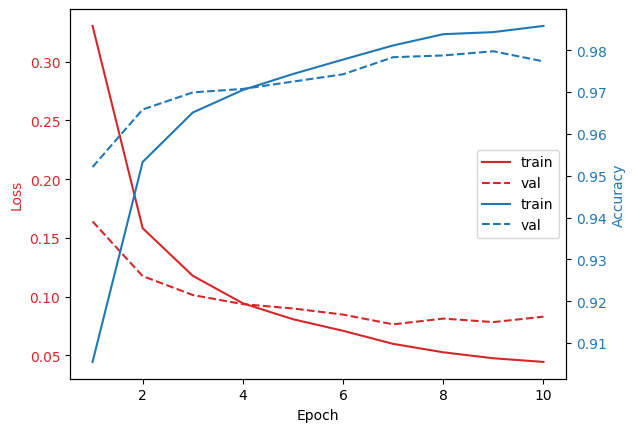

In [33]:
draw_graph(hist)

## k-fold cross validation

- 데이터를 k개 fold로 나눠서 1개씩 validation set으로 할당 -> 모든 데이터를 train/val에 사용
- 특정 학습/평가 데이터에 하이퍼파라미터 튜닝하고 있는지 확인
- k-fold 중에서 가장 좋은 모델을 고르는 건 의미 없음 -> 해당 모델이 다른 데이터셋에서도 성능이 좋을거란 보장 없음
- k-fold로 여러 모델들을 테스트하고 최종 선택된 모델에 전체 데이터 학습시켜서 사용 or 각 모델의 예측값을 평균(like 앙상블)


In [52]:
model5 = MyModel()

model5.summary()

model5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss',
                   patience=3,
                   restore_best_weights= True)

pred_list = []
loss_sum = acc_sum = 0


k = 5
kfold = KFold(n_splits=k, shuffle=True)

for i, (train_idx, val_idx) in enumerate(kfold.split(x_train)):
  print(f"Fold {i+1}")

  x_trn, y_trn = x_train[train_idx], y_train[train_idx]
  x_val, y_val = x_train[val_idx], y_train[val_idx]


  es = EarlyStopping(monitor='val_loss',
                     patience=3,
                    restore_best_weights= True)
  history = model5.fit(x_trn,
                       y_trn,
                       epochs=20,
                       batch_size=32,
                       validation_data=(x_val, y_val), callbacks=es)


  pred = model5.predict(x_test)
  pred_list.append(pred)
  loss, acc = model5.evaluate(x_test, y_test)
  loss_sum = loss_sum + loss
  acc_sum = acc_sum + acc
  print(f'loss: {loss:.4f} accuracy: {acc:.4f}')

print('*'*150)
print(f'loss avg: {loss_sum / k:.4f} accuracy avg: {acc_sum / k:.4f}')
print('*'*150)

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 28, 28)]     0           []                               
                                                                                                  
 flatten_16 (Flatten)           (None, 784)          0           ['input_16[0][0]']               
                                                                                                  
 dense_31 (Dense)               (None, 128)          100480      ['flatten_16[0][0]']             
                                                                                                  
 dropout_15 (Dropout)           multiple             0           ['dense_31[0][0]',               
                                                                  'dense_32[0][0]']        

In [55]:
y_train_onehot = to_categorical(y_train, 10)
y_test_onehot = to_categorical(y_test, 10)

In [81]:
class CNNModel(Model):
  def __init__(self):
    super(CNNModel, self).__init__()
    self.flatten = Flatten()
    self.dropout = Dropout(0.2)
    self.maxpool = MaxPooling2D(pool_size=(2, 2), padding='same')
    self.conv1 = Conv2D(filters=512,
                        kernel_size=(3, 3),
                        input_shape=(28, 28, 1),
                        padding='same',
                        activation='relu')
    self.conv2 = Conv2D(filters=256,
                        kernel_size=(3, 3),
                        padding='same',
                        activation='relu')
    self.conv3 = Conv2D(filters=128,
                        kernel_size=(3, 3),
                        padding='same',
                        activation='relu')
    self.conv4 = Conv2D(filters=64,
                        kernel_size=(3, 3),
                        padding='same',
                        activation='relu')
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(64, activation='relu')
    self.softmax = Dense(10, activation='softmax')

  def call(self, x):
    x = self.maxpool(self.conv1(x))
    x = self.maxpool(self.conv2(x))
    x = self.maxpool(self.conv3(x))
    x = self.maxpool(self.conv4(x))
    x = self.flatten(x)
    return self.softmax(x)

  def summary(self):
    inputs = Input((28, 28, 1))
    Model(inputs, self.call(inputs)).summary()

In [86]:
cnn = CNNModel()

cnn.summary()

cnn.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss',
                   patience=3,
                   restore_best_weights= True)

pred_list = []
loss_sum = acc_sum = 0


k = 5
kfold = KFold(n_splits=k, shuffle=True)

x_train_norm_re = x_train_norm.reshape(x_train_norm.shape[0], x_train_norm.shape[1], x_train_norm.shape[2], 1)
x_test_norm_re = x_test_norm.reshape(x_test_norm.shape[0], x_test_norm.shape[1], x_test_norm.shape[2], 1)

print(x_train_norm_re.shape)
print(x_test_norm_re.shape)

for i, (train_idx, val_idx) in enumerate(kfold.split(x_train_norm_re)):
  print(f"Fold {i+1}")

  x_trn, y_trn = x_train_norm_re[train_idx], y_train_onehot[train_idx]
  x_val, y_val = x_train_norm_re[val_idx], y_train_onehot[val_idx]

  print(x_trn.shape)
  es = EarlyStopping(monitor='val_loss',
                      patience=3,
                      restore_best_weights= True)
  history = cnn.fit(x_trn,
                    y_trn,
                    epochs=20,
                    batch_size=128,
                    validation_data=(x_val, y_val), callbacks=es)


  pred = cnn.predict(x_test_norm_re)
  pred_list.append(pred)
  loss, acc = cnn.evaluate(x_test_norm_re, y_test_onehot)
  loss_sum = loss_sum + loss
  acc_sum = acc_sum + acc
  print(f'loss: {loss:.4f} accuracy: {acc:.4f}')

print('*'*150)
print(f'loss avg: {loss_sum / k:.4f} accuracy avg: {acc_sum / k:.4f}')
print('*'*150)

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_31 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_80 (Conv2D)             (None, 28, 28, 512)  5120        ['input_31[0][0]']               
                                                                                                  
 max_pooling2d_35 (MaxPooling2D  multiple            0           ['conv2d_80[0][0]',              
 )                                                                'conv2d_81[0][0]',              
                                                                  'conv2d_82[0][0]',              
                                                                  'conv2d_83[0][0]']       

(60000, 28, 28, 1)
(10000, 28, 28, 1)
Fold 1
(48000, 28, 28, 1)
Epoch 1/20
  9/375 [..............................] - ETA: 32:49 - loss: 2.0705 - accuracy: 0.3134

KeyboardInterrupt: ignored